# Análisis de Sentimientos de Opiniones Turísticas

Este notebook realiza un análisis de sentimientos sobre las opiniones turísticas recopiladas basándose en las calificaciones de estrellas (1-5) para evaluar la percepción de los visitantes sobre diferentes atracciones turísticas.

## Objetivos:
- Cargar dataset de una ciudad específica
- Crear una nueva columna 'Sentimiento' basada en las calificaciones (1-5 estrellas)
- Mapear calificaciones a tres categorías: Positivo, Neutro, Negativo
- Generar estadísticas descriptivas de los sentimientos
- Mostrar ejemplos representativos de cada categoría de sentimiento

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importar los módulos de análisis de sentimientos (nueva estructura modular)
import sys
sys.path.append('../scripts')
from sentimientos import (
    AnalizadorCalificaciones, 
    cargar_dataset_ciudad, 
    mostrar_info_dataset
)

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")
print("✅ Módulo de análisis de sentimientos cargado (nueva estructura modular)")
print("📁 Usando: sentimientos/analizador_calificaciones.py")

✅ Librerías importadas correctamente
✅ Módulo de análisis de sentimientos cargado (nueva estructura modular)
📁 Usando: sentimientos/analizador_calificaciones.py


In [2]:
# Ruta actualizada para la nueva estructura de datos
dataset_path = '../data/processed/datasets_por_ciudad/dataset_cdmx.csv'

# Cargar los datos
df = pd.read_csv(dataset_path)
print(f"📊 Dataset cargado: {dataset_path}")
print(f"📈 Dimensiones: {df.shape}")
print(f"🏙️  Ciudad: {df['Ciudad'].iloc[0] if 'Ciudad' in df.columns else 'No especificada'}")
print(f"📝 Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

# Mostrar las primeras filas
display(df.head())

📊 Dataset cargado: ../data/processed/datasets_por_ciudad/dataset_cdmx.csv
📈 Dimensiones: (614, 10)
🏙️  Ciudad: Cdmx
📝 Columnas disponibles:
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview


Titulo  \
0  AVENIDA PRINCIPAL CIUDAD DE MÉXICO   
1                           Hermoso 💚   
2                       Sé consciente   
3   Bicicleta dominical en la Reforma   
4                       Bella avenida   

                                              Review  TipoViaje  Calificacion  \
0  Avenida Ciudad de México. Es mucho tiempo así ...  Solitario             5   
1  Es hermoso su paisaje y recorrerlo, lo malo so...     Pareja             5   
2  La foto de la entrada no coincide con esta ubi...  Solitario             5   
3  Está cerrado a los coches el domingo, así que ...     Pareja             5   
4  México sin duda un excelente destino de vacaci...    Familia             4   

                     OrigenAutor FechaOpinion FechaEstadia Ciudad  \
0                        anonimo   2025-09-01   2025-08-01   Cdmx   
1  Santiago de Querétaro, México   2025-05-30   2025-05-01   Cdmx   
2                     Dallas, TX   2025-04-01   2025-04-01   Cdmx   
3                        Grenada   2025-03-18   2025-03-01   Cdmx   
4                        anonimo   2025-03-13   2025-02-01   Cdmx   

             Atraccion                                       TituloReview  
0  Paseo De La Reforma  AVENIDA PRINCIPAL CIUDAD DE MÉXICO Avenida Ciu...  
1  Paseo De La Reforma  Hermoso 💚 Es hermoso su paisaje y recorrerlo, ...  
2  Paseo De La Reforma  Sé consciente La foto de la entrada no coincid...  
3  Paseo De La Reforma  Bicicleta dominical en la Reforma Está cerrado...  
4  Paseo De La Reforma  Bella avenida México sin duda un excelente des...

In [3]:
# Inicializar el analizador de sentimientos (nueva clase modular)
analizador = AnalizadorCalificaciones()

print("🛠️ Analizador de sentimientos inicializado correctamente")
print("📁 Usando: AnalizadorCalificaciones (nueva estructura modular)")
print("📋 Mapeo de calificaciones:")
print("   • 4-5 estrellas → Positivo")
print("   • 3 estrellas → Neutro") 
print("   • 1-2 estrellas → Negativo")

🛠️ Analizador de sentimientos inicializado correctamente
📁 Usando: AnalizadorCalificaciones (nueva estructura modular)
📋 Mapeo de calificaciones:
   • 4-5 estrellas → Positivo
   • 3 estrellas → Neutro
   • 1-2 estrellas → Negativo


In [4]:
# Aplicar el análisis de sentimientos al dataset
df = analizador.procesar_sentimientos_dataset(df)

# Mostrar una muestra del resultado
print("\n" + "="*60)
print("MUESTRA DEL DATASET CON SENTIMIENTOS")
print("="*60)
display(df[['TituloReview', 'Calificacion', 'Sentimiento']].head(8))

🔄 Creando columna 'Sentimiento' basada en las calificaciones...
✅ Columna 'Sentimiento' creada exitosamente
📊 Total de registros procesados: 614

MUESTRA DEL DATASET CON SENTIMIENTOS


TituloReview  Calificacion Sentimiento
0  AVENIDA PRINCIPAL CIUDAD DE MÉXICO Avenida Ciu...             5    Positivo
1  Hermoso 💚 Es hermoso su paisaje y recorrerlo, ...             5    Positivo
2  Sé consciente La foto de la entrada no coincid...             5    Positivo
3  Bicicleta dominical en la Reforma Está cerrado...             5    Positivo
4  Bella avenida México sin duda un excelente des...             4    Positivo
5  Caminé por parte de esta calle un domingo cuan...             3      Neutro
6  "Caminata agradable" El Paseo de la Reforma es...             4    Positivo
7  Caminata Es una calle que disfrutas desde que ...             5    Positivo

In [5]:
# Generar y mostrar estadísticas descriptivas de los sentimientos
estadisticas = analizador.obtener_estadisticas_sentimientos(df)

# Mostrar estadísticas en consola
analizador.mostrar_estadisticas_consola(estadisticas)

# Mostrar tablas detalladas
print("\n" + "="*60)
print("📋 RELACIÓN SENTIMIENTO vs CALIFICACIÓN")
print("="*60)
display(estadisticas['tabla_cruzada'])

print("\n🎯 SENTIMIENTOS POR ATRACCIÓN TURÍSTICA (Top 10):")
print("-" * 50)
display(estadisticas['por_atraccion'].head(10))

📊 ESTADÍSTICAS DESCRIPTIVAS DE SENTIMIENTOS
🔢 DISTRIBUCIÓN DE SENTIMIENTOS:
----------------------------------------
  Positivo: 507 registros ( 82.6%)
    Neutro:  70 registros ( 11.4%)
  Negativo:  37 registros (  6.0%)

📈 TOTAL DE REGISTROS: 614

📋 RELACIÓN SENTIMIENTO vs CALIFICACIÓN


Calificacion   1   2   3    4    5  All
Sentimiento                            
Negativo      22  15   0    0    0   37
Neutro         0   0  70    0    0   70
Positivo       0   0   0  130  377  507
All           22  15  70  130  377  614


🎯 SENTIMIENTOS POR ATRACCIÓN TURÍSTICA (Top 10):
--------------------------------------------------


Sentimiento                         Negativo  Neutro  Positivo
Atraccion                                                     
Acuario Michin Ciudad De Mexico            9      36        29
Basilica De La Virgen Guadalupe            0       1        67
Jardines Flotantes De Xochimilco          15       7        47
Mercado De Artesanias La Ciudadela         4      10        49
Museo Del Templo Mayor                     1       1        51
Museo Nacional De Antropologia             0       1        42
Palacio De Bellas Artes                    2       0        63
Paseo De La Reforma                        0       5        55
Polanco                                    2       2        53
Zocalo De La Ciudad De Mexico              4       7        51

📈 GENERANDO VISUALIZACIONES DE SENTIMIENTOS
✅ Visualizaciones generadas exitosamente
✅ Visualizaciones generadas exitosamente


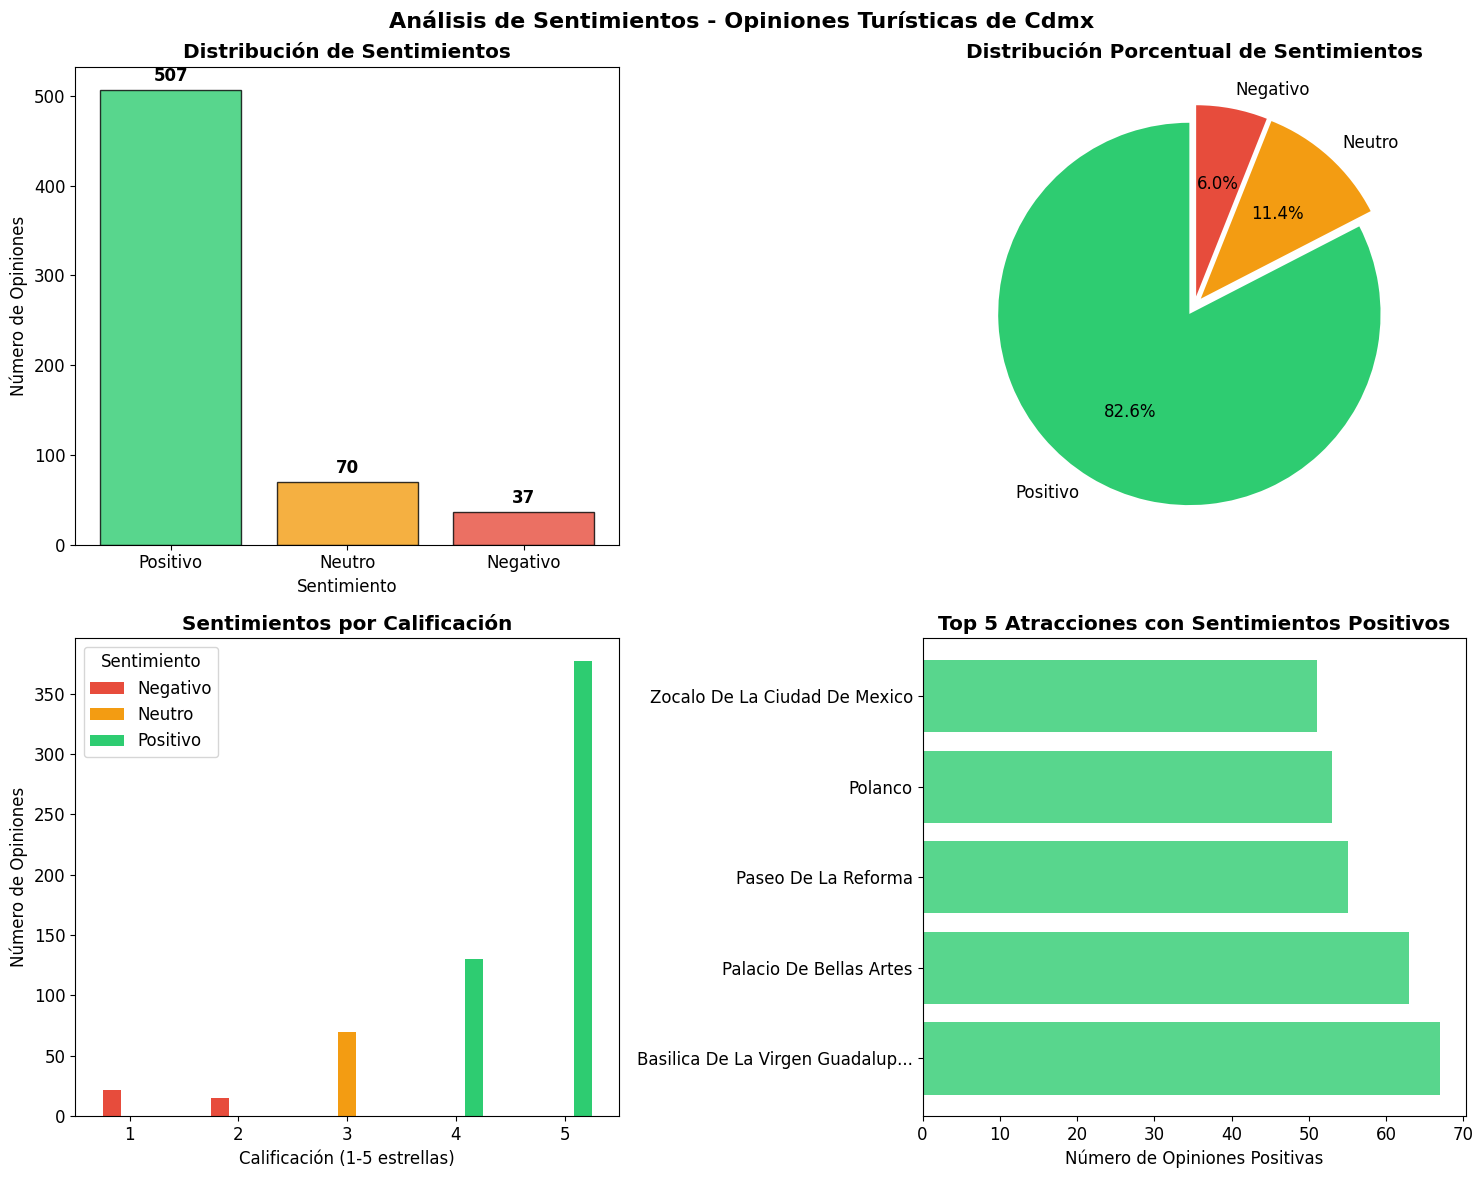

✅ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)


In [6]:
# Crear visualizaciones de los sentimientos (usando el nuevo visualizador modular)
from sentimientos import VisualizadorSentimientos

visualizador = VisualizadorSentimientos()
ciudad = df['Ciudad'].iloc[0]
fig = visualizador.crear_visualizaciones_basicas(df, ciudad)
plt.show()

print("✅ Visualizaciones generadas usando VisualizadorSentimientos (estructura modular)")

In [7]:
# Mostrar ejemplos representativos de cada sentimiento
analizador.mostrar_todos_los_ejemplos(df, n_ejemplos=3)

# Generar resumen final
analizador.generar_resumen_final(df)

📝 EJEMPLOS REPRESENTATIVOS DE CADA SENTIMIENTO

🎯 EJEMPLOS DE SENTIMIENTO POSITIVO
------------------------------------------------------------

📌 Ejemplo 1:
   🏛️ Atracción: Zocalo De La Ciudad De Mexico
   ⭐ Calificación: 5/5
   📅 Fecha: 2023-09-01
   💬 Opinión: "Buena comida Estábamos pasando y tenía un 50% de descuento en la comida y el servicio fue excelente, especialmente porque tengo alergia a la leche. Margarita estuvo muy buena. Gracias, fue una gran ex..."
   --------------------------------------------------

📌 Ejemplo 2:
   🏛️ Atracción: Basilica De La Virgen Guadalupe
   ⭐ Calificación: 5/5
   📅 Fecha: 2024-04-01
   💬 Opinión: "La basílica proporcionó un recorrido en inglés organizado con anticipación. Antes de nuestra primera visita, reservé un recorrido privado para nuestro grupo de 3 parejas a través del sitio web de la B..."
   --------------------------------------------------

📌 Ejemplo 3:
   🏛️ Atracción: Zocalo De La Ciudad De Mexico
   ⭐ Calificación: 4/5
   📅 Fec

# Análisis de Sentimientos con Modelos Preentrenados de HuggingFace

En esta segunda parte del análisis, utilizaremos modelos preentrenados de HuggingFace para clasificar sentimientos basándose en el contenido textual de las opiniones, y luego compararemos estos resultados con la clasificación basada en calificaciones de estrellas.

## Objetivos de esta sección:
- Cargar un modelo preentrenado de HuggingFace optimizado para análisis de sentimientos
- Aplicar el modelo al contenido textual de las opiniones (columna `TituloReview`)
- Comparar los resultados obtenidos con la clasificación basada en calificaciones
- Identificar concordancias y discordancias entre ambos métodos
- Analizar ejemplos donde los métodos difieren para entender mejor las diferencias

In [8]:
# Instalar e importar librerías para modelos preentrenados
print("📦 Verificando librerías necesarias para HuggingFace...")

try:
    import transformers
    print("✅ Transformers ya está instalado")
except ImportError:
    print("⏳ Instalando transformers...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "transformers[torch]"])
    print("✅ Transformers instalado exitosamente")

# Importar el analizador de HuggingFace (nueva estructura modular)
from sentimientos import AnalizadorHuggingFace

print("✅ Analizador de HuggingFace importado correctamente")
print("📁 Usando: sentimientos/analizador_huggingface.py")

📦 Verificando librerías necesarias para HuggingFace...
✅ Transformers ya está instalado
✅ Analizador de HuggingFace importado correctamente
📁 Usando: sentimientos/analizador_huggingface.py


In [9]:
# Inicializar el analizador de HuggingFace (nueva clase modular)
print("🤖 Inicializando analizador de sentimientos con HuggingFace...")

# Usamos un modelo multilingüe optimizado para español
# Este modelo funciona bien en hardware limitado (16GB RAM, 6 cores)
analizador_hf = AnalizadorHuggingFace(
    modelo_nombre="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Cargar el modelo
exito = analizador_hf.cargar_modelo()

if exito:
    print("🎯 Modelo recomendado para este hardware:")
    print("   • Modelo: bert-base-multilingual-uncased-sentiment")
    print("   • Tamaño: ~400MB aproximadamente")
    print("   • Soporte: Multilingüe (incluye español)")
    print("   • Optimizado para: Análisis de sentimientos en reseñas")
    print("📁 Usando: AnalizadorHuggingFace (nueva estructura modular)")
else:
    print("❌ No se pudo cargar el modelo de HuggingFace")

🤖 Inicializando analizador de sentimientos con HuggingFace...
🤖 Cargando modelo: nlptown/bert-base-multilingual-uncased-sentiment
⏳ Esto puede tomar unos momentos la primera vez...


Device set to use cuda:0


✅ Modelo cargado exitosamente
🌍 Modelo: nlptown/bert-base-multilingual-uncased-sentiment
🎯 Modelo recomendado para este hardware:
   • Modelo: bert-base-multilingual-uncased-sentiment
   • Tamaño: ~400MB aproximadamente
   • Soporte: Multilingüe (incluye español)
   • Optimizado para: Análisis de sentimientos en reseñas
📁 Usando: AnalizadorHuggingFace (nueva estructura modular)


In [10]:
# Aplicar análisis de sentimientos con HuggingFace al dataset completo
print("🚀 Iniciando análisis de sentimientos con modelo preentrenado...")
print("⚠️  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware")

# Procesar el dataset completo
df_con_hf = analizador_hf.procesar_dataset_completo(df, 'TituloReview')

print(f"\n✅ Análisis con HuggingFace completado")
print(f"📊 Dataset ahora contiene {len(df_con_hf.columns)} columnas:")
print(f"   • Sentimiento (por calificación)")
print(f"   • SentimientoHF (por modelo preentrenado)")

# Mostrar una muestra comparativa
print("\n" + "="*80)
print("MUESTRA COMPARATIVA DE AMBOS MÉTODOS")
print("="*80)
display(df_con_hf[['TituloReview', 'Calificacion', 'Sentimiento', 'SentimientoHF']].head(10))

🚀 Iniciando análisis de sentimientos con modelo preentrenado...
⚠️  NOTA: Este proceso puede tomar 5-10 minutos dependiendo del hardware
🔄 Procesando sentimientos con HuggingFace para 614 registros...
⏳ Esto puede tomar varios minutos...
   Procesando registro 1/614 (0.2%)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   Procesando registro 26/614 (4.2%)
   Procesando registro 51/614 (8.3%)
   Procesando registro 51/614 (8.3%)
   Procesando registro 76/614 (12.4%)
   Procesando registro 76/614 (12.4%)
   Procesando registro 101/614 (16.4%)
   Procesando registro 101/614 (16.4%)
   Procesando registro 126/614 (20.5%)
   Procesando registro 126/614 (20.5%)
   Procesando registro 151/614 (24.6%)
   Procesando registro 151/614 (24.6%)
   Procesando registro 176/614 (28.7%)
   Procesando registro 176/614 (28.7%)
   Procesando registro 201/614 (32.7%)
   Procesando registro 201/614 (32.7%)
   Procesando registro 226/614 (36.8%)
   Procesando registro 226/614 (36.8%)
   Procesando registro 251/614 (40.9%)
   Procesando registro 251/614 (40.9%)
   Procesando registro 276/614 (45.0%)
   Procesando registro 276/614 (45.0%)
   Procesando registro 301/614 (49.0%)
   Procesando registro 301/614 (49.0%)
   Procesando registro 326/614 (53.1%)
   Procesando registro 326/614 (53.1%)
   Procesando registro 351/614 (5

TituloReview  Calificacion  \
0  AVENIDA PRINCIPAL CIUDAD DE MÉXICO Avenida Ciu...             5   
1  Hermoso 💚 Es hermoso su paisaje y recorrerlo, ...             5   
2  Sé consciente La foto de la entrada no coincid...             5   
3  Bicicleta dominical en la Reforma Está cerrado...             5   
4  Bella avenida México sin duda un excelente des...             4   
5  Caminé por parte de esta calle un domingo cuan...             3   
6  "Caminata agradable" El Paseo de la Reforma es...             4   
7  Caminata Es una calle que disfrutas desde que ...             5   
8  Me gustó venir Es una avenida llena de comerci...             5   
9  Muy disfrutable avenida Preciosa avenida paa r...             5   

  Sentimiento SentimientoHF  
0    Positivo      Positivo  
1    Positivo      Positivo  
2    Positivo      Negativo  
3    Positivo      Negativo  
4    Positivo      Positivo  
5      Neutro        Neutro  
6    Positivo      Positivo  
7    Positivo      Positivo  
8    Positivo      Positivo  
9    Positivo      Positivo

In [11]:
# Comparar los resultados de ambos métodos (usando el nuevo comparador modular)
from sentimientos import ComparadorSentimientos

print("🔍 COMPARACIÓN ENTRE MÉTODOS DE ANÁLISIS")
print("="*60)

# Inicializar el comparador
comparador = ComparadorSentimientos()

# Realizar comparación estadística
comparacion = comparador.comparar_sentimientos(df_con_hf)

# Mostrar estadísticas de comparación
comparador.mostrar_comparacion(comparacion)

# Mostrar la tabla de confusión detallada
print("\n📊 TABLA DE CONFUSIÓN DETALLADA:")
print("-" * 50)
display(comparacion['tabla_confusion'])

print("📁 Usando: ComparadorSentimientos (nueva estructura modular)")

🔍 COMPARACIÓN ENTRE MÉTODOS DE ANÁLISIS
📊 COMPARACIÓN DE MÉTODOS DE ANÁLISIS DE SENTIMIENTOS
🎯 CONCORDANCIA GENERAL:
   • Total de registros: 614
   • Registros concordantes: 532
   • Porcentaje de concordancia: 86.6%

📋 ESTADÍSTICAS POR SENTIMIENTO:
--------------------------------------------------

Positivo:
   📊 Por calificación: 507 registros
   🤖 Por HuggingFace: 499 registros
   ✅ Concordancia: 471 registros (92.9%)

Neutro:
   📊 Por calificación: 70 registros
   🤖 Por HuggingFace: 49 registros
   ✅ Concordancia: 29 registros (41.4%)

Negativo:
   📊 Por calificación: 37 registros
   🤖 Por HuggingFace: 66 registros
   ✅ Concordancia: 32 registros (86.5%)

📊 TABLA DE CONFUSIÓN DETALLADA:
--------------------------------------------------


HuggingFace   Negativo  Neutro  Positivo  All
Calificación                                 
Negativo            32       2         3   37
Neutro              16      29        25   70
Positivo            18      18       471  507
All                 66      49       499  614

📁 Usando: ComparadorSentimientos (nueva estructura modular)


📈 VISUALIZACIONES DE COMPARACIÓN


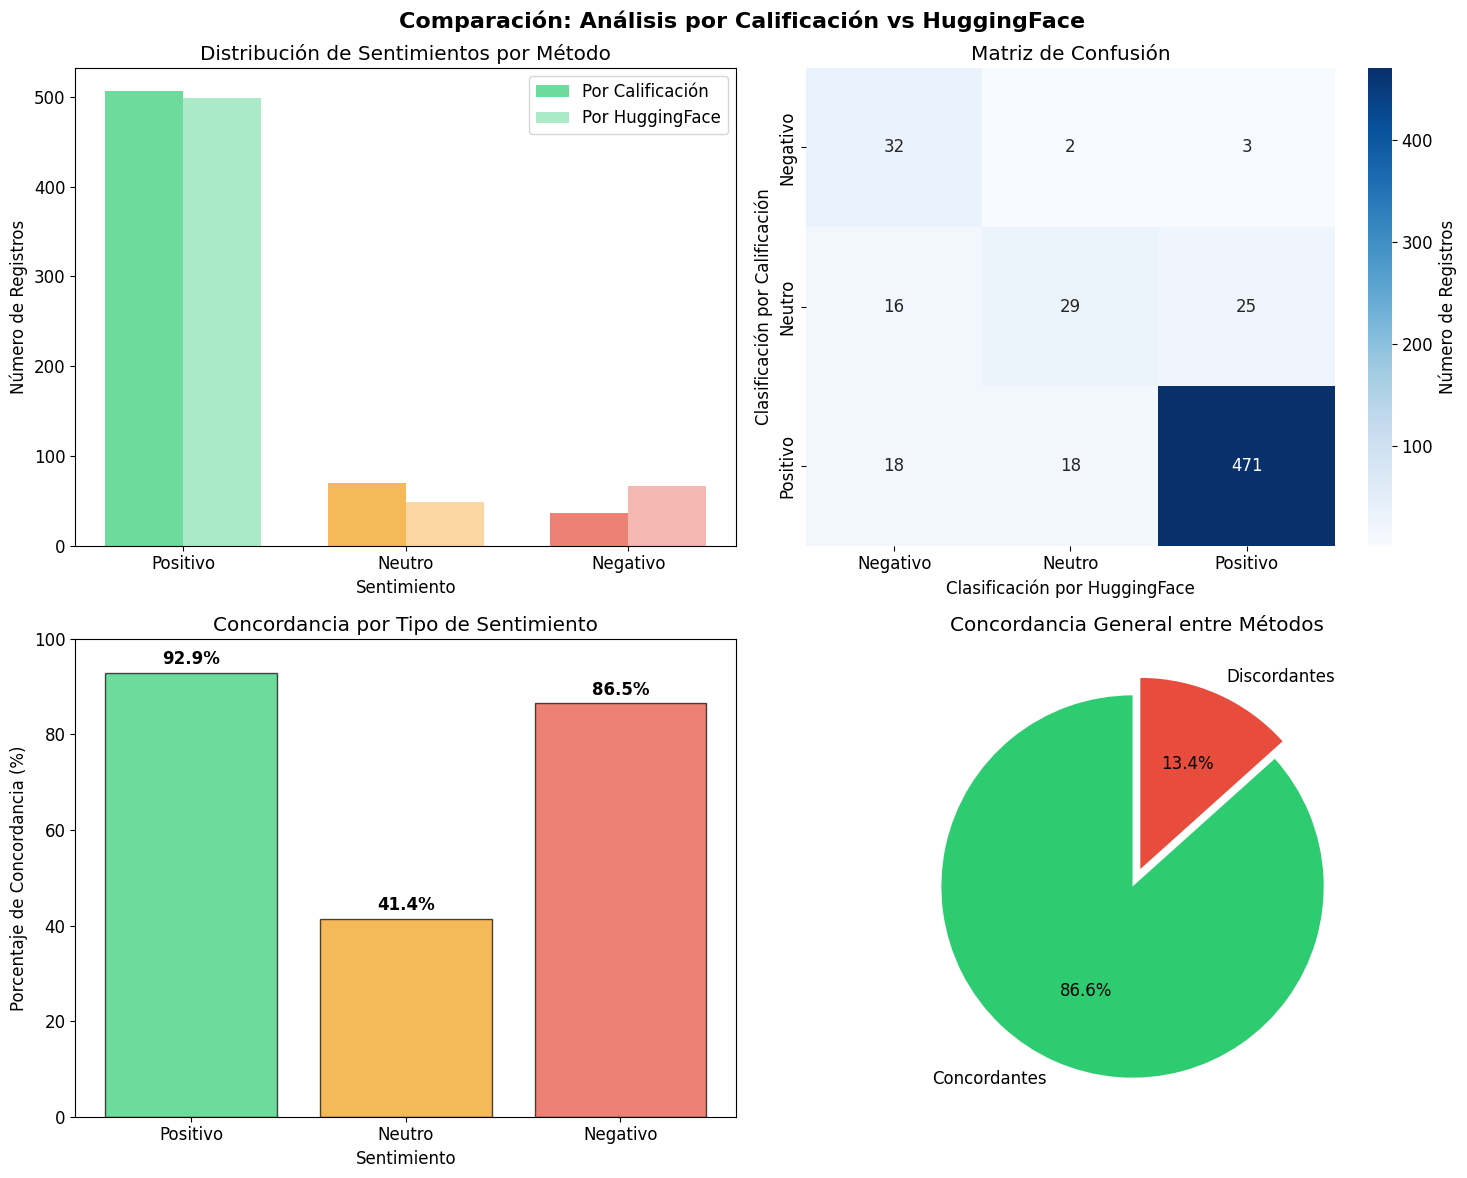

✅ Visualizaciones de comparación generadas exitosamente
📁 Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()


In [12]:
# Crear visualizaciones de comparación entre ambos métodos
print("📈 VISUALIZACIONES DE COMPARACIÓN")
print("="*50)

# Crear las visualizaciones usando el visualizador modular
fig_comparacion = visualizador.crear_visualizacion_comparacion(df_con_hf, comparacion)
plt.show()

print("✅ Visualizaciones de comparación generadas exitosamente")
print("📁 Usando: VisualizadorSentimientos.crear_visualizacion_comparacion()")

In [13]:
# Mostrar ejemplos donde los métodos difieren
print("🔍 ANÁLISIS DE DISCORDANCIAS ENTRE MÉTODOS")
print("="*70)

# Mostrar algunos ejemplos de discordancias (muestra limitada)
analizador_hf.mostrar_ejemplos_discordantes(df_con_hf, n_ejemplos=3)

print("\n" + "🔄" * 25 + " ANÁLISIS COMPLETO " + "🔄" * 25)

# 📋 NUEVA FUNCIONALIDAD: Mostrar TODAS las discordancias completas
# Esta función muestra el texto completo de todas las opiniones discordantes
print("\n🆕 Para ver TODAS las opiniones discordantes completas:")
discordantes_completas = analizador_hf.mostrar_todas_discordancias(df_con_hf)

# Calcular métricas de precisión adicionales usando el comparador
metricas = comparador.calcular_metricas_precision(df_con_hf)
print("\n📊 MÉTRICAS DE PRECISIÓN DETALLADAS:")
print("="*50)
comparador.mostrar_metricas_precision(metricas)

print("\n" + "="*70)
print("📊 RESUMEN FINAL DE LA COMPARACIÓN")
print("="*70)
print(f"✅ Análisis completado para {len(df_con_hf)} opiniones")
print(f"🏙️ Ciudad analizada: {df_con_hf['Ciudad'].iloc[0]}")
print(f"🎯 Atracciones únicas: {df_con_hf['Atraccion'].nunique()}")
print(f"\n📈 Métodos comparados:")
print(f"   • Clasificación por calificación (1-5 estrellas)")
print(f"   • Clasificación por modelo preentrenado (HuggingFace)")
print(f"\n🔍 Concordancia entre métodos: {comparacion['porcentaje_concordancia']:.1f}%")
print(f"📊 Casos discordantes: {len(df_con_hf) - comparacion['concordancia_total']} de {len(df_con_hf)}")

print(f"\n💡 EXTRA: Se han mostrado {len(discordantes_completas)} opiniones discordantes completas arriba")
print("📋 Cada opinión se muestra sin cortes para análisis detallado")
print("\n🏗️ ESTRUCTURA MODULAR UTILIZADA:")
print("   📁 sentimientos/analizador_calificaciones.py")
print("   📁 sentimientos/analizador_huggingface.py") 
print("   📁 sentimientos/visualizaciones_sentimientos.py")
print("   📁 sentimientos/comparador_sentimientos.py")

🔍 ANÁLISIS DE DISCORDANCIAS ENTRE MÉTODOS
🔍 EJEMPLOS DE DISCORDANCIAS ENTRE MÉTODOS
📊 Total de discordancias: 82/614 (13.4%)

🎯 Negativo (Calificación) → Neutro (HuggingFace): 2 casos
------------------------------------------------------------

📌 Ejemplo 1:
   🏛️ Atracción: Jardines Flotantes De Xochimilco
   ⭐ Calificación: 1/5 → Negativo
   🤖 HuggingFace: Neutro
   💬 Opinión: "no muy impresionado Está bien para los jóvenes, solo una trampa para turistas sin mucho que ofrecer. Caro para lo que era. Viaje por un canal cerrado con todos tratando de vender basura. No es una cosa de la lista de deseos"
   --------------------------------------------------

📌 Ejemplo 2:
   🏛️ Atracción: Acuario Michin Ciudad De Mexico
   ⭐ Calificación: 1/5 → Negativo
   🤖 HuggingFace: Neutro
   💬 Opinión: "El personal muy amable, su trabajo muy bien Deberían de dejar de tener animales en cautiverio, es muy triste como los tienen los pingüinos traían algo de metal en su aleta es espantoso"
   ------------

In [14]:
# Exportar el dataset con análisis de sentimientos incluido
from sentimientos import exportar_dataset_con_sentimientos

print("💾 EXPORTANDO DATASET CON ANÁLISIS DE SENTIMIENTOS")
print("=" * 60)

# Obtener el nombre de la ciudad
ciudad = df_con_hf['Ciudad'].iloc[0]

# Exportar el dataset con la nueva columna SentimientoHF
exito_exportacion = exportar_dataset_con_sentimientos(df_con_hf, ciudad)

if exito_exportacion:
    print(f"\n✅ El dataset de {ciudad} con análisis de sentimientos ha sido guardado exitosamente")
    print(f"📁 El archivo incluye todas las columnas originales más 'SentimientoHF'")
    print(f"🔄 Este archivo será usado en el análisis de subjetividad")
else:
    print(f"\n❌ Error al exportar el dataset")

print("\n📋 COLUMNAS INCLUIDAS EN EL DATASET EXPORTADO:")
print("-" * 50)
for i, col in enumerate(df_con_hf.columns, 1):
    print(f"   {i:2}. {col}")

💾 EXPORTANDO DATASET CON ANÁLISIS DE SENTIMIENTOS
✅ Dataset con sentimientos exportado exitosamente
📁 Archivo: dataset_cdmx_sentimientos.csv
📍 Ubicación: ../data/processed/datasets_por_ciudad/dataset_cdmx_sentimientos.csv
📊 Registros: 614
📋 Columnas incluidas: Titulo, Review, TipoViaje, Calificacion, OrigenAutor, FechaOpinion, FechaEstadia, Ciudad, Atraccion, TituloReview, Sentimiento, SentimientoHF

✅ El dataset de Cdmx con análisis de sentimientos ha sido guardado exitosamente
📁 El archivo incluye todas las columnas originales más 'SentimientoHF'
🔄 Este archivo será usado en el análisis de subjetividad

📋 COLUMNAS INCLUIDAS EN EL DATASET EXPORTADO:
--------------------------------------------------
    1. Titulo
    2. Review
    3. TipoViaje
    4. Calificacion
    5. OrigenAutor
    6. FechaOpinion
    7. FechaEstadia
    8. Ciudad
    9. Atraccion
   10. TituloReview
   11. Sentimiento
   12. SentimientoHF
